In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd 

from scipy.optimize import minimize
from astropy.convolution import Gaussian2DKernel

In [25]:
Ra =  95.4586
Dec = -51.2377
Size = 60
Maglim = 12
Zeropoint = 20.44
tpf = sd.Get_TESS(Ra,Dec,Size)
# pos returned as column row 
pos, gmag = sd.Get_Gaia(tpf,magnitude_limit=Maglim)
col = pos[:,0]
row = pos[:,1]

Tmag = gmag - 0.5
tcounts = 10**(-2/5*(Tmag - Zeropoint))

/Users/ryanr/miniconda3/lib/python3.7/site-packages/lightkurve/search.py:233: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [28]:
Interpolate = True
FFT = False
Scale = 100
sources = np.zeros((len(pos),tpf.shape[1]*Scale,tpf.shape[2]*Scale)) #+ bkg
for i in range(len(pos)):
    if Interpolate:
        template = np.zeros((2*tpf.shape[1]*Scale,2*tpf.shape[2]*Scale))
        #print('template shape ',template.shape)
        offset1 = int(0.5 * tpf.shape[1] * Scale)
        offset2 = int(0.5 * tpf.shape[2] * Scale)
        #print(np.nansum(template))
        kernal = sd.Interp_PRF(row[i] + tpf.row, col[i] + tpf.column,tpf.camera,tpf.ccd,Scale)
        #print(np.nansum(kernal))
        if FFT:
            template[int(row[i]*Scale + offset1),int(col[i]*Scale+ offset2)] = tcounts[i]
            template = sd.signal.fftconvolve(template, kernal, mode='same')
        else:
            optics = kernal * tcounts[i]
            r = int(row[i]*Scale + offset1)
            c = int(col[i]*Scale + offset2)
            template = sd.Add_convolved_sources(r,c,optics,template)
        #print(np.nansum(template))
        template = template[offset1:int(3*offset1),offset2:int(3*offset2)]
        #print('template shape ',template.shape)
        sources[i] = template
        #sources[i] = sd.Downsample(template,Scale)

In [29]:
from skimage.measure import block_reduce
import time as tt

In [30]:
scene = np.nansum(sources,axis=0)
s = tt.perf_counter()
mine = sd.Downsample(scene,Scale)
print('mine',tt.perf_counter()-s)
s = tt.perf_counter()
block = block_reduce(scene,block_size=(100,100),func=np.nansum)
print('block',tt.perf_counter()-s)

mine 0.9361141029999089
block 1.1559231969999928


<IPython.core.display.Javascript object>


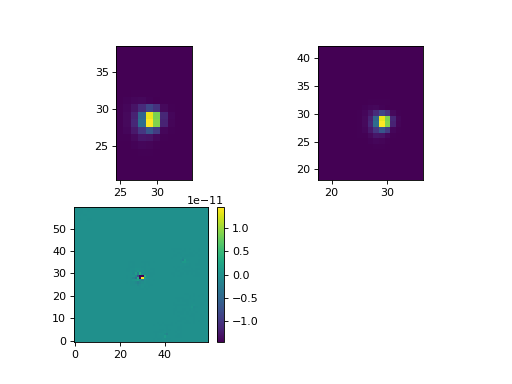

In [31]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(mine,origin='lower')

plt.subplot(2,2,2)
plt.imshow(block,origin='lower')

plt.subplot(2,2,3)
plt.imshow(block-mine,origin='lower')
plt.colorbar()

In [36]:
'019'.strip('0')

'19'

In [37]:
a = np.arange(10)

In [39]:
b = np.array([])

In [40]:
np.append(b,a)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [41]:
11 == '11'

False